# Customer Churn Decision Tree

Note: on top of `numpy`, `pandas`, `matplotlib`, you need two more packages for this assignment: `scikit-learn` (for building decision tree and other machine learning models) and 
`pydotplus` (for visualizing the decision trees), you want to add those packages to your `requirements.txt` file and install them before running this notebook.

In [24]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

## Question 1
- what's the shape of the dataframe created from the csv file?  
>Shape is (3333,7)
- how many features and what are their datatype?
>7 features
state is object  
account length is int64  
international plan is object  
total day minutes is float64  
total day calls is int64  
customer service calls  is int64  
churn is bool



- are there any null values in the dataset?
>There are zero null values
- create a histogram for the target feature and calculate the churn rate
- if you want to make a "naive" prediction on customer churn rate, what's the rule? 
> My naive prediction is that a customer is not gonna churn(leave) because the churn rate is only about 14.49%

In [7]:
# load the csv file
df_train=pd.read_csv('customer-churn-example-simple.csv')


(3333, 7)

,state,account length,international plan,total day minutes,total day calls,customer service calls,churn
0,KS,128,no,265.1,110,1,False
1,OH,107,no,161.6,123,1,False
2,NJ,137,no,243.4,114,0,False
3,OH,84,yes,299.4,71,2,False
4,OK,75,yes,166.7,113,3,False


In [8]:
# check the basic info for the df
display(df_train.info())
display(df_train.shape)
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   customer service calls  3333 non-null   int64  
 6   churn                   3333 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 159.6+ KB


None

(3333, 7)

,state,account length,international plan,total day minutes,total day calls,customer service calls,churn
0,KS,128,no,265.1,110,1,False
1,OH,107,no,161.6,123,1,False
2,NJ,137,no,243.4,114,0,False
3,OH,84,yes,299.4,71,2,False
4,OK,75,yes,166.7,113,3,False


In [10]:
# change churn to string from boolean for histogram and decision tree modeling
df_train['churn'] = df_train['churn'].apply(str)

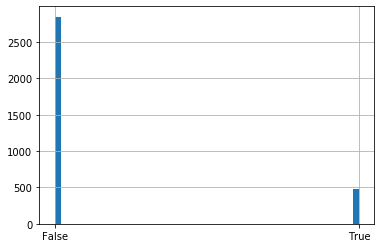

In [11]:
# create a histogram for churn
df_train['churn'].hist(bins=50)

In [35]:
# calculate the churn rate
counts=df_train['churn'].value_counts()
counts[1]/(counts[1]+counts[0])*100


14.491449144914492

## Task
Build a decision tree:

- use only 'account length', 'total day calls', 'customer service calls' features
- use entropy as the criterion and set the max depth for the tree to 4 
- visualize the tree as shown in the sample code provided in the class. 
- explain the first node (root) of your generated tree (example each line in the node - what they mean)
- make predictions for three customers based on the sample input found in the comments below and explain your predictions - do they make sense?
- by looking at the decision tree image and change one value for customer 2 to flip the prediction and explain why

In [28]:
# build your DT using 'account length', 'total day calls', 'customer service calls' features
X=df_train[['account length','total day calls','customer service calls']]
Y=df_train['churn']
print(X.shape)
print(Y.shape)
from sklearn.tree import DecisionTreeClassifier


(3333, 3)
(3333,)


0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: object

In [27]:
# train a DT model
tree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=4)
tree_clf.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# load the packages for visulizing the tree

from IPython.display import Image 
from sklearn import tree 
import pydotplus

In [32]:
# get feature and class names for visulization
print(X.columns.values.tolist())
print(Y.unique().tolist())
cls_names=['churn(left)' if i=='True' else'stayed'for i in Y.unique().tolist()]
cls_names

['account length', 'total day calls', 'customer service calls']
['False', 'True']


['stayed', 'churn(left)']

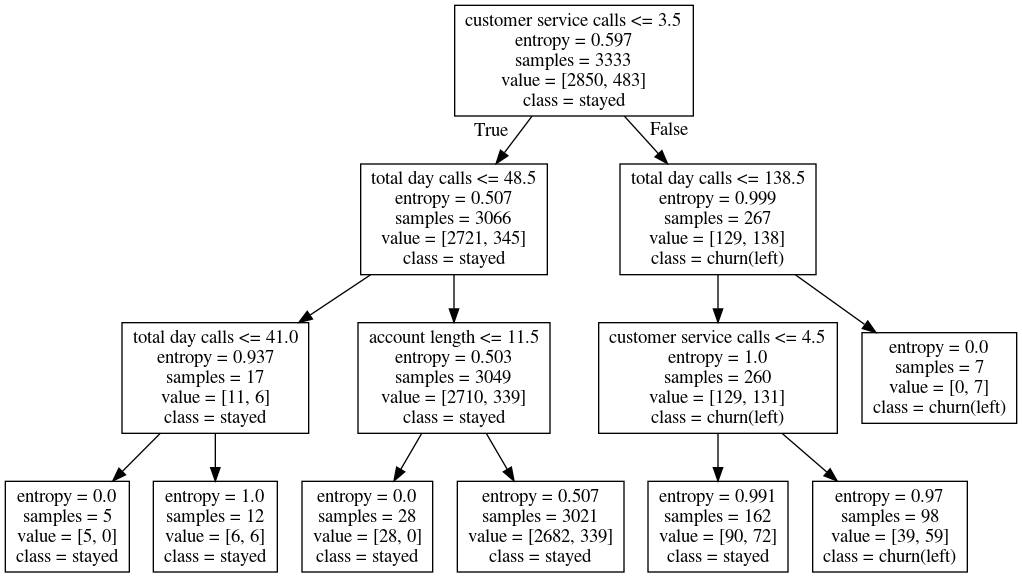

In [33]:
# Create DOT data and visualize the tree
dot_data=tree.export_graphviz(tree_clf,feature_names=X.columns.values.tolist(),class_names=cls_names,)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

>the tree is splitted based on the true or false of the condition customer service calls<=3.5  
The current entropy of the node is = 0.597  
The total number of samples in this node is 3333  
How many samples belong to each class, 483 belong to class churn True (left) and 2850 belong to class churn False (stayed)  
This shows the prediction of this node, because its node 0 its the naive prediction based on the churn rate of all customers, and the prediciton is that they stay

In [47]:
# make predictions for the following customers
# customer 1 who open the account 25 days ago with total day calls of 100 and called customer support 5 times
# customer 2 who open the account 125 days ago with total day calls of 150 and called customer support 0 times
# customer 3 who open the account 600 days ago with total day calls of 1150 and called customer support 8 times
customer1=tree_clf.predict([[25,100,5]])
customer2=tree_clf.predict([[125,150,0]])
customer3=tree_clf.predict([[600,1150,8]])
print(customer1,customer2,customer3)

['True'] ['False'] ['True']


>The first and thirs customer will churn (leave ) based on the prediciton the second one will stay.
They make sense based on the modell, but its a bird weird that customer 3 will leave after 600 days thats a long time, but based on the modell it makes sense


In [46]:
customer2_after_change=tree_clf.predict([[125,150,3.51]])
print(customer2_after_change)

['True']


>I just need to change the customer service calls to a value bigger than 3.5 and than customer 2 will also churn(leave)